In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
def Loss(x,y,beta):
    return np.sum((x@beta-y)**2)/len(x)
def Gradient(x,y,beta):
    return -2/len(x)*x.T@(y-x@beta)

In [3]:
data=pd.read_csv('Boston.csv')
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df=np.array(data)
for i in range(0,13):
    df[:,i]=(df[:,i]-np.mean(df[:,i]))/np.std(df[:,i])
X=df[:,0:13]
E = np.ones(len(X)) 
X = np.column_stack([E, X])
Y=df[:,13]
train_data, test_data = train_test_split(df, test_size=0.2, random_state=123)
train_X=train_data[:,0:13]
E = np.ones(len(train_X)) 
train_X = np.column_stack([E, train_X])
train_Y=train_data[:,13]
test_X=test_data[:,0:13]
E = np.ones(len(test_X)) 
test_X = np.column_stack([E, test_X])
test_Y=test_data[:,13]
l=[10**(-3+0.1*i) for i in range(0,60)]
MSE=[0]*60

[49.02325645718729, 49.02325645718729, 49.02325645718729, 49.02325645718729, 49.02325645718729, 49.02325645718729, 49.02325645718729, 49.02325645718729, 49.02325645718729, 52.118583476058234, 52.118583476058234, 52.118583476058234, 52.118583476058234, 52.118583476058234, 49.02325645718729, 49.02325645718729, 49.02325645718729, 49.02325645718729, 49.02325645718729, 49.02325645718729, 49.02325645718729, 49.02325645718729, 52.85295947555943, 49.02325645718729, 52.85295947555943, 49.02325645718729, 52.85295947555943, 55.433331238606506, 52.85295947555943, 52.85295947555943, 56.79258042036547, 56.79258042036547, 61.943278085411514, 64.19171888835547, 64.19171888835547, 64.19171888835547, 71.37580643215702, 75.61048106070608, 91.04886693741733, 110.50687651848912, 133.98450980392158, 149.30215686274508, 166.61980392156866, 207.25509803921565, 283.2080392156863, 377.16098039215694, 530.431568627451, 619.0668627450981, 619.0668627450981, 619.0668627450981, 619.0668627450981, 619.0668627450981,

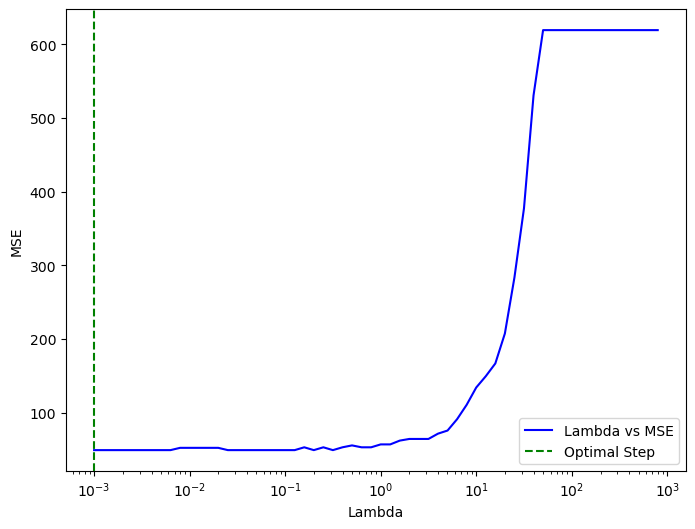

In [5]:
miu=0.1
for i in range(0,60):
    beta_p1=np.zeros(14)
    beta_p2=np.array([100]*14)
    iteration=0
    while np.sqrt(np.sum((beta_p2-beta_p1)**2))>0.001 and iteration<1000:
        beta_p1=beta_p2.copy()
        G=Gradient(train_X,train_Y,beta_p1)
        beta_mid=beta_p1-miu*G
        for j in range(0,14):
            if beta_mid[j]>l[i]*miu:
                beta_p2[j]=beta_mid[j]-l[i]*miu
            elif beta_mid[j]<-l[i]*miu:
                beta_p2[j]=beta_mid[j]+l[i]*miu
            else:
                beta_p2[j]=0
        iteration=iteration+1
        if iteration%100==0:
            print(f'i={i}')
            print(f'iteration:{iteration}')
            print(np.sqrt(np.sum((beta_p2-beta_p1)**2)))
    MSE[i]=Loss(test_X,test_Y,beta_p1)   
print(MSE)
index=MSE.index(min(MSE))
figure=plt.figure(figsize=(8, 6))
plt.semilogx(l,MSE,color="blue",label="Lambda vs MSE")
plt.axvline(x=l[index], color='green', linestyle='--',label='Optimal Step')
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.legend()

In [6]:
beta_p1=np.zeros(14)
beta_p2=np.array([100]*14)
iteration=0
while np.sqrt(np.sum((beta_p2-beta_p1)**2))>0.001 and iteration<1000:
    beta_p1=beta_p2.copy()
    G=Gradient(train_X,train_Y,beta_p1)
    beta_mid=beta_p1-miu*G
    for j in range(0,14):
        if beta_mid[j]>l[0]*miu:
            beta_p2[j]=beta_mid[j]-l[0]*miu
        elif beta_mid[j]<-l[i]*miu:
             beta_p2[j]=beta_mid[j]+l[0]*miu
        else:
            beta_p2[j]=0
    iteration=iteration+1
    if iteration%100==0:
        print(f'iteration:{iteration}')
        print(np.sqrt(np.sum((beta_p2-beta_p1)**2)))
print(beta_p1)

[21  0  0  0  0  0  5  0  0  0  0  0  1  0]


0.001
